In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report
import scikitplot as skplt
import matplotlib.pyplot as plt
from simpletransformers.language_representation import RepresentationModel

# Carregando base de dados  pré-processada

In [2]:
database = pd.read_csv("../../Database/dataBaseWithNER.csv")

database = database.drop(columns=["Unnamed: 0"])
database = database.dropna()
target = database["target"].values.tolist()
database

,email,target
0,start date hourahead timee cardinall hou...,0
1,service long desk price structure deal quote ...,0
2,start date cardinall hourahead timee card...,0
3,start date hourahead timee cardinall anc...,0
4,cardinall deliverable revenue management marke...,0
...,...,...
33340,bio matrix scientific group symbo bmxg p...,1
33341,cardinall step away hot naked webcam girl liv...,1
33342,need pill increase performance click seroius ...,1
33343,datee final nom inlet hpl eastrans car...,0


In [3]:
emailsText = []
for email in database["email"]:
    emailsText.append(email)

In [4]:
print(len(emailsText))

33341


# Representação vetorial GPT2

In [5]:
model=RepresentationModel(
    model_type="gpt2",
    model_name="gpt2",
    use_cuda=True,
    #fp16=True
)

vectorialRepresentation = model.encode_sentences(emailsText, combine_strategy="mean")
vectorialRepresentation.shape

Some weights of the model checkpoint at gpt2 were not used when initializing GPT2ForTextRepresentation: ['h.4.mlp.c_fc.bias', 'h.5.mlp.c_fc.weight', 'h.10.ln_1.weight', 'h.6.mlp.c_proj.weight', 'h.2.attn.c_proj.weight', 'wte.weight', 'h.5.ln_1.bias', 'h.3.mlp.c_fc.bias', 'h.5.mlp.c_proj.weight', 'h.8.mlp.c_proj.weight', 'h.4.ln_2.bias', 'h.4.attn.c_proj.bias', 'h.2.ln_2.bias', 'h.3.ln_2.weight', 'h.10.mlp.c_proj.bias', 'h.0.attn.bias', 'h.11.ln_2.bias', 'h.3.mlp.c_proj.weight', 'h.8.ln_2.bias', 'h.3.attn.c_proj.bias', 'h.9.attn.c_proj.weight', 'h.9.ln_1.bias', 'h.0.ln_1.bias', 'h.10.ln_2.weight', 'h.2.mlp.c_fc.weight', 'h.8.mlp.c_fc.bias', 'h.1.attn.c_attn.bias', 'h.7.ln_2.weight', 'h.3.ln_1.weight', 'h.8.mlp.c_proj.bias', 'h.4.attn.c_proj.weight', 'h.6.mlp.c_proj.bias', 'h.7.ln_1.bias', 'h.9.mlp.c_proj.weight', 'h.2.ln_2.weight', 'h.4.mlp.c_fc.weight', 'h.5.attn.c_attn.weight', 'h.7.attn.bias', 'h.7.ln_1.weight', 'h.6.attn.c_proj.weight', 'h.9.mlp.c_fc.bias', 'h.11.ln_1.weight', 'h.0.

(33341, 768)

In [6]:
gpt2Dataframe = pd.DataFrame(vectorialRepresentation)
gpt2Dataframe

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,2.432295,-0.093498,-0.275616,0.232219,-0.147429,1.766835,0.475205,0.186184,0.223384,-1.091114,...,-0.139626,1.009171,0.000161,-1.385114,0.153864,2.822134,1.522955,0.786604,-0.748891,0.994930
1,2.457893,0.692926,0.399736,-0.406665,-1.223928,2.127721,-0.426484,-0.099923,1.102615,-1.339036,...,-1.186514,2.093531,-0.314166,-0.633624,-1.341084,1.687200,0.487268,0.295489,-1.293660,0.908109
2,2.802501,0.761098,-0.256448,-0.256922,-0.184076,1.778750,0.524001,0.272463,-0.183115,-0.794217,...,-0.134036,0.636995,0.291504,-1.287605,0.675958,2.222274,1.039553,1.457527,-0.566689,0.794463
3,2.559943,0.440694,-0.164696,-0.199634,-0.320036,2.061574,0.482535,0.030460,0.228932,-0.977275,...,-0.037972,0.966329,0.267005,-1.382962,0.191902,2.244401,1.023060,1.123152,-0.611560,0.793289
4,1.378478,0.678298,-0.846600,0.152847,-0.187875,1.400886,1.827272,-0.091550,0.921683,-1.454416,...,-0.238706,1.188646,-1.154469,-0.555459,0.557703,1.562755,0.927980,0.929163,-1.588155,-0.214183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33336,2.727573,0.806268,-0.509134,-0.575385,-0.565596,2.100595,0.572332,0.766660,-0.160964,-0.627278,...,0.462017,1.217918,-0.714154,-1.432837,-0.129645,1.155439,1.165254,1.613089,-0.054492,0.478307
33337,2.460510,0.415460,-0.787173,-0.722554,-0.474267,2.315821,0.047856,0.194495,-0.469708,-1.738560,...,-0.181604,0.846267,-0.070745,-0.654671,0.265567,1.880705,0.345114,1.172919,-0.490596,0.305874
33338,1.906154,0.842924,-0.208755,0.525594,-0.323234,2.196710,0.110598,0.081667,-0.132737,-1.606453,...,-0.590640,2.039541,-0.154769,-1.303533,-0.808209,1.876450,1.475909,1.798554,-0.121606,0.389516
33339,2.039853,1.250390,-0.172191,0.293197,0.091020,1.981126,0.666586,0.488344,0.230154,-0.519556,...,0.498865,1.317365,-0.555753,-1.310731,0.164110,2.047854,0.859513,1.406687,-0.715885,1.076652


# Visualização de dados com TSNE

C:\Users\victo\anaconda3\envs\conda_data_science_gpu_on_torch\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\victo\anaconda3\envs\conda_data_science_gpu_on_torch\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


               0          1  Target
0      78.198051  15.803736       0
1      -8.168677 -13.443456       0
2      68.610374 -10.624249       0
3      -3.680197  71.350594       0
4     -17.665276  58.581997       0
...          ...        ...     ...
33336  27.901169 -12.025276       1
33337  10.560597  35.977131       1
33338  10.511292  -0.784959       1
33339  -7.091450   6.361189       0
33340  12.388700  34.350636       1

[33341 rows x 3 columns]


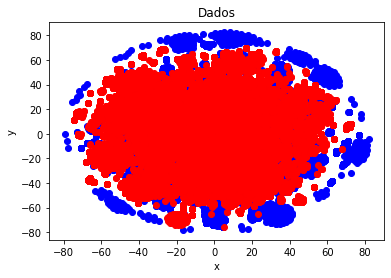

In [7]:
model = TSNE(n_components=2, random_state=0)
array_red = model.fit_transform(gpt2Dataframe)

df_tsne = pd.DataFrame(array_red)

df_tsne['Target'] = target
print(df_tsne)
df_tsne_c1 = df_tsne[df_tsne['Target'] == 0]

df_tsne_c2 = df_tsne[df_tsne['Target'] == 1]

plt.scatter(df_tsne_c1[0].array,df_tsne_c1[1].array,marker='o',color='blue')

plt.scatter(df_tsne_c2[0].array,df_tsne_c2[1].array,marker='o',color='red')

plt.title('Dados')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

# Validação

In [8]:
def getModel():
    return RandomForestClassifier()

In [9]:
X_treino, X_teste, y_treino, y_teste = train_test_split(gpt2Dataframe.values,target,test_size=0.2)
modelo = getModel().fit(X_treino,y_treino)
score = modelo.score(X_teste,y_teste)
score

0.8728445044234517

In [10]:
scores = cross_val_score(getModel(),gpt2Dataframe.values,target,cv=10)

scores.mean()

0.8761884414721253

In [11]:
predicoes = cross_val_predict(getModel(), gpt2Dataframe.values, target, cv=10)

In [12]:
print("\nClassification Report : ")
print(classification_report(target, predicoes, target_names=["Ham", "Spam"]))


Classification Report : 
              precision    recall  f1-score   support

         Ham       0.89      0.85      0.87     16493
        Spam       0.86      0.89      0.88     16848

    accuracy                           0.87     33341
   macro avg       0.87      0.87      0.87     33341
weighted avg       0.87      0.87      0.87     33341



(array([0, 1]), [Text(0, 0, 'Ham'), Text(1, 0, 'Spam')])

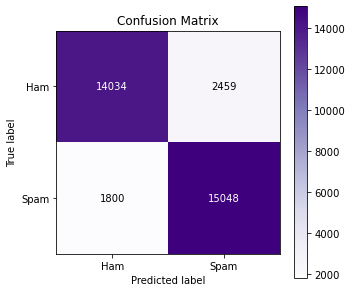

In [13]:
categories = ["Ham", "Spam"]

skplt.metrics.plot_confusion_matrix(
    [categories[i] for i in target], [categories[i] for i in predicoes.tolist()],
    title="Confusion Matrix",
    cmap="Purples",
    hide_zeros=True,
    figsize=(5,5)
)

plt.xticks()

(array([0, 1]), [Text(0, 0, 'Ham'), Text(1, 0, 'Spam')])

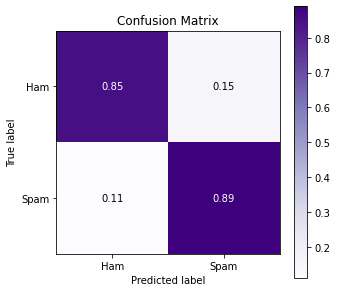

In [14]:
skplt.metrics.plot_confusion_matrix(
    [categories[i] for i in target], [categories[i] for i in predicoes.tolist()],
    normalize=True,
    title="Confusion Matrix",
    cmap="Purples",
    hide_zeros=True,
    figsize=(5,5)
)

plt.xticks()